### 연습문제

1. 컬러 사진을 numpy 어레이로 불러온다. (snoopy.jpg 등)

2. 좌우 대칭변환, 상하 대칭변환을 하고 출력해 보자. (역순 적용)

3. 높이와 넓이를 반으로 줄여 보자. (간격 적용)

4. (도전문제) 흑백 이미지로 변환해 보자. (채널값을 평균하거나 최대값 추출)

5. 흑백이미지 또는 red 채널 이미지를, 왼쪽/오른쪽
    90도 회전해 보자. 또한 180도 회전도 적용해 보자.
    (.T 기능 사용)

6. (도전문제) 랜덤 함수를 사용하여 0과 1로 구성된 랜덤 필터를 생성하고,
    이를 원본 이미지에 적용해 보자. (곱셈 사용)
    랜덤값을 얻을 때, 1이 90% 확률로 나오도록 해보자. (0~9를 선택 또는 choice)

7. (도전문제) numpy 에서 이미지는 RGB 채널로 되어 있다. 이를
   BGR 채널값으로 바꾸어 보자. 또한 480X640X3 과 같은 형태를
   3X480X640 형태로 바꾸는 방법을 생각해 보자.


- 1번

In [2]:
import numpy as np
import matplotlib.pyplot as plt

(720, 1280, 3)


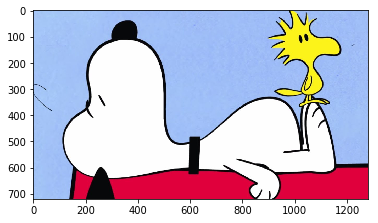

In [21]:
img = plt.imread('snoopy.jpg')
print(img.shape)
plt.imshow(img)

- 2번

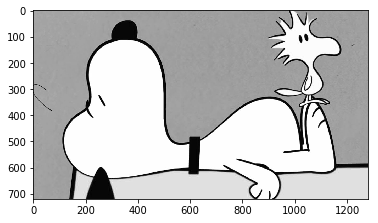

In [5]:
plt.imshow(img[:,:,0], cmap='gray', vmin=0,vmax=255)

In [64]:
a = np.arange(30).reshape(3,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [65]:
a[:,::-1]

array([[ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
       [19, 18, 17, 16, 15, 14, 13, 12, 11, 10],
       [29, 28, 27, 26, 25, 24, 23, 22, 21, 20]])

In [67]:
a[::-1]

array([[20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]])

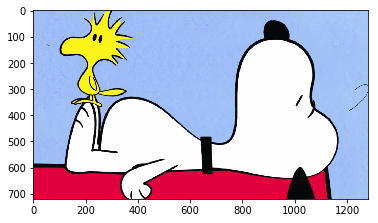

In [7]:
plt.imshow(img[:,::-1])

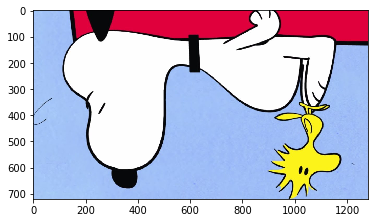

In [8]:
plt.imshow(img[::-1])

(360, 640, 3)


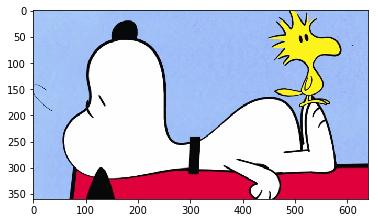

In [12]:
img2 = img[::2,::2]
print(img2.shape)
plt.imshow(img2)

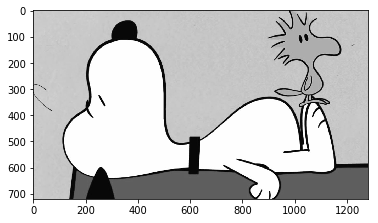

In [58]:
gray = img.mean(axis=2).astype('int')
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

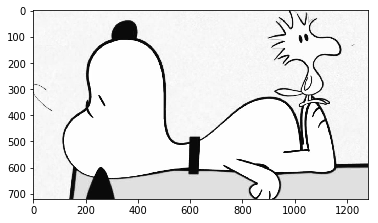

In [59]:
plt.imshow(img.max(axis=2).astype('int'), cmap='gray', vmin=0,vmax=255) 
# 3차원으로 흑백이미지 만들기(보편적)
# 평균을 내고 나서 int(소수점을 짤라주기) 해주는 것이 좋다

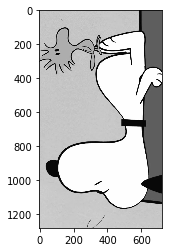

In [61]:
plt.imshow(gray.T[::-1], cmap='gray', vmin=0, vmax=255)

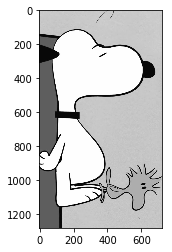

In [60]:
plt.imshow(gray.T[:,::-1], cmap='gray', vmin=0, vmax=255)

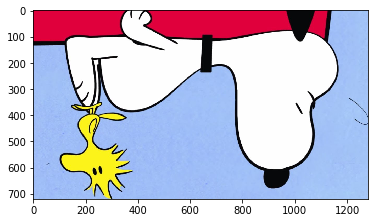

In [23]:
plt.imshow(img[::-1,::-1])

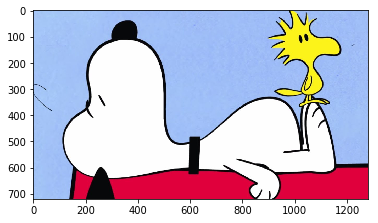

In [28]:
plt.imshow(img)

In [25]:
filter=np.random.randint(2, size=img.shape)
img3=(filter*img).astype('uint8')
img3.shape, img3.dtype, img3.max(), img3.min()

((720, 1280, 3), dtype('uint8'), 255, 0)

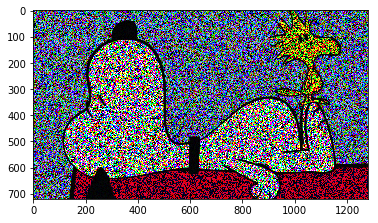

In [29]:
plt.imshow(img3)

#### 변환
- RGB -> BGR
- B를 R로 보낸다

In [71]:
img[0,0]

array([165, 197, 246], dtype=uint8)

In [69]:
img[0,0,::-1]

array([246, 197, 165], dtype=uint8)

In [70]:
img[:,:,::-1][0,0]

array([246, 197, 165], dtype=uint8)

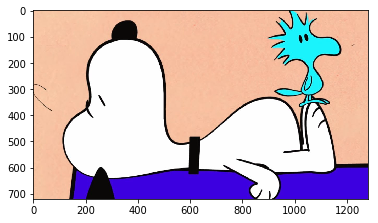

In [73]:
# RGB -> BGR
plt.imshow(img[:,:,[2,1,0]]) # 팬시색인
# plt.imshow(img[:,:,::-1]) 

In [46]:
img.shape 
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

img4 = np.array([r,g,b])
img4.shape, img4.dtype
# opencv(pip install opencv-python)

((3, 720, 1280), dtype('uint8'))

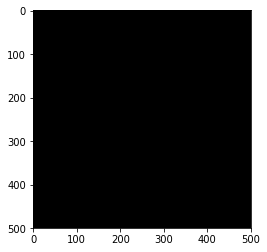

In [52]:
canvas = np.zeros([500,500,3])
plt.imshow(canvas)

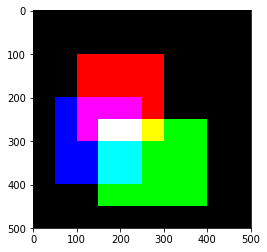

In [57]:
canvas[100:300, 100:300, 0] = 1
canvas[250:450, 200:400, 1] = 1
canvas[200:400, 50:250, 2] = 1

plt.imshow(canvas)

- 팬시색인 복습

In [75]:
b=np.arange(12).reshape(4,3)
b

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [78]:
b[[0,-1]]

array([[ 0,  1,  2],
       [ 9, 10, 11]])

In [79]:
b[:,[0,-1]]

array([[ 0,  2],
       [ 3,  5],
       [ 6,  8],
       [ 9, 11]])

In [76]:
b[[2]]

array([[6, 7, 8]])

In [77]:
b[2]

array([6, 7, 8])

### Boolean Index


- True/False와 조건식 적용
- 행과 열의 위치에 True/False를 적용할 수 있다.
- 그리고 True/False 의 결과를 내는 조건식을 적용할 수 있다.
- 항목 개수가 똑같아야 한다.

In [81]:
a=np.array([3,4,1,2,7])
a[[False,True,False,False,True]]

array([4, 7])

In [82]:
a>3

array([False,  True, False, False,  True])

##### Numpy는 무조건 항목별로 적용된다!

In [83]:
a[a>3]

array([4, 7])

In [84]:
a[a<3]

array([1, 2])

In [85]:
a[a%2==1]

array([3, 1, 7])

##### 연습문제
- 주사위를 100번 던져서 3보다 큰 수가 나온 횟수를 구하시오(불리언 색인 이용)

In [95]:
h=np.random.randint(1,7,size=100)
h

array([4, 4, 2, 6, 5, 2, 2, 2, 4, 1, 1, 6, 1, 5, 2, 3, 4, 2, 3, 1, 5, 1,
       4, 4, 2, 5, 3, 4, 3, 5, 6, 6, 4, 2, 5, 3, 3, 1, 2, 5, 3, 4, 5, 4,
       2, 3, 4, 4, 3, 4, 6, 4, 1, 5, 4, 6, 1, 4, 6, 2, 5, 3, 2, 4, 2, 2,
       6, 1, 2, 3, 1, 1, 6, 5, 4, 1, 6, 3, 3, 1, 6, 2, 4, 1, 4, 1, 2, 4,
       1, 3, 1, 2, 4, 6, 1, 1, 4, 2, 2, 5])

In [97]:
h[h>3].mean()

4.76595744680851

In [98]:
h[h>3].shape

(47,)

In [100]:
h[h>4]=-1
h

array([ 4,  4,  2, -1, -1,  2,  2,  2,  4,  1,  1, -1,  1, -1,  2,  3,  4,
        2,  3,  1, -1,  1,  4,  4,  2, -1,  3,  4,  3, -1, -1, -1,  4,  2,
       -1,  3,  3,  1,  2, -1,  3,  4, -1,  4,  2,  3,  4,  4,  3,  4, -1,
        4,  1, -1,  4, -1,  1,  4, -1,  2, -1,  3,  2,  4,  2,  2, -1,  1,
        2,  3,  1,  1, -1, -1,  4,  1, -1,  3,  3,  1, -1,  2,  4,  1,  4,
        1,  2,  4,  1,  3,  1,  2,  4, -1,  1,  1,  4,  2,  2, -1])

In [101]:
a=np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [102]:
a[[True,False,False,True]]

array([[ 0,  1,  2],
       [ 9, 10, 11]])

In [103]:
a>4

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [104]:
a[:,0]==3

array([False,  True, False, False])

In [105]:
a[[False,  True, False, False]]

array([[3, 4, 5]])

In [106]:
a[a[:,0]==3]
# select * from 성적 where 국어>3

array([[3, 4, 5]])

In [107]:
a[a[:,2]%2==1]

array([[ 3,  4,  5],
       [ 9, 10, 11]])

In [109]:
a[a[:,1]!=4]

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

#### iris data

In [111]:
iris = np.loadtxt('iris.csv', delimiter=',', skiprows=1,usecols=[0,1,2,3])
iris.shape

(150, 4)

In [113]:
iris[:,1].mean()

3.0540000000000003

In [114]:
iris[iris[:,1]>4]

array([[5.7, 4.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2]])

In [119]:
y=np.array([0]*50+[1]*50+[2]*50)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [118]:
iris[iris[:,-1]<0.8]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

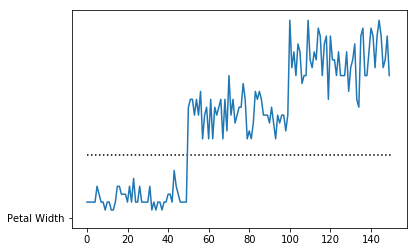

In [121]:
plt.plot(iris[:,-1])
plt.plot('Petal Width')
plt.hlines(0.8, 0, 150, linestyles=':')

#### 성적표 데이터 실습

In [7]:
scores = np.loadtxt('성적표2.csv', delimiter=',', skiprows=2, usecols=[0,1,2,3])

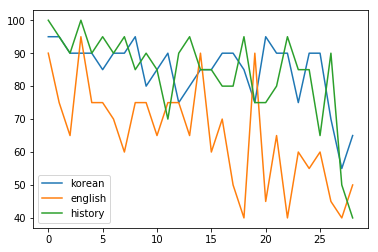

In [12]:
plt.plot(scores[:,1:])
plt.legend(['korean','english','history'])


[0, 100, 0, 100]

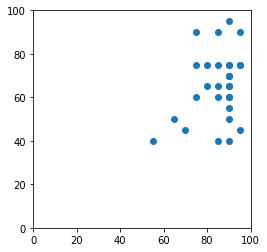

In [11]:
plt.scatter(scores[:,1], scores[:,2])
plt.axis('scaled')
plt.axis([0,100,0,100])

In [22]:
kook=scores[(scores[:,1]>90) & (scores[:,2]<70)] # 국어와 영어
kook

array([[8.00036e+05, 9.50000e+01, 4.50000e+01, 7.50000e+01]])

In [21]:
scores[scores[:,1:].mean(axis=1)>85] #학생별 평균

array([[8.00019e+05, 9.50000e+01, 9.00000e+01, 1.00000e+02],
       [8.00032e+05, 9.50000e+01, 7.50000e+01, 9.50000e+01],
       [8.00005e+05, 9.00000e+01, 9.50000e+01, 1.00000e+02],
       [8.00029e+05, 8.50000e+01, 9.00000e+01, 8.50000e+01]])

In [24]:
scores2 = np.array(sorted(scores, key=lambda a: a[0])) # 응시번호 순으로 정렬
scores2

array([[8.00001e+05, 8.50000e+01, 6.00000e+01, 8.50000e+01],
       [8.00002e+05, 9.00000e+01, 7.50000e+01, 9.00000e+01],
       [8.00003e+05, 9.00000e+01, 5.50000e+01, 8.50000e+01],
       [8.00004e+05, 7.00000e+01, 4.50000e+01, 9.00000e+01],
       [8.00005e+05, 9.00000e+01, 9.50000e+01, 1.00000e+02],
       [8.00006e+05, 7.50000e+01, 6.00000e+01, 8.50000e+01],
       [8.00008e+05, 8.00000e+01, 7.50000e+01, 9.00000e+01],
       [8.00009e+05, 6.50000e+01, 5.00000e+01, 4.00000e+01],
       [8.00011e+05, 9.00000e+01, 7.50000e+01, 7.00000e+01],
       [8.00012e+05, 9.00000e+01, 4.00000e+01, 9.50000e+01],
       [8.00013e+05, 9.00000e+01, 7.00000e+01, 9.00000e+01],
       [8.00016e+05, 7.50000e+01, 7.50000e+01, 9.00000e+01],
       [8.00017e+05, 9.00000e+01, 6.50000e+01, 8.00000e+01],
       [8.00019e+05, 9.50000e+01, 9.00000e+01, 1.00000e+02],
       [8.00021e+05, 8.50000e+01, 4.00000e+01, 9.50000e+01],
       [8.00022e+05, 5.50000e+01, 4.00000e+01, 5.00000e+01],
       [8.00023e+05, 8.0

#### axis 개념

In [28]:
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [29]:
a.sum(axis=0)

array([18, 22, 26])

In [30]:
a.sum(axis=1)

array([ 3, 12, 21, 30])

In [31]:
a.mean(axis=1)

array([ 1.,  4.,  7., 10.])

In [32]:
a.all(), a.any()

(False, True)

In [33]:
a.all(axis=1)

array([False,  True,  True,  True])

In [34]:
(a>3).all(axis=1)

array([False, False,  True,  True])